Full example. Titanic dataset
Your first goal always should be getting a generalized prediction as fast as possible
#This does not mean to skip exploratory data anyalysis (EDA). It just means to not get caught up on it. Intially do only what is needed to get a generalized prediction.
#Getting a prediction first lets you set a benchmark for yourself. As you make improvements to the model. you should be able to see your desired error metric improve

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd


In [31]:
train=pd.read_csv(r'C:\Users\dungthuy\Desktop\Python_Class\Titanic\train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [37]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

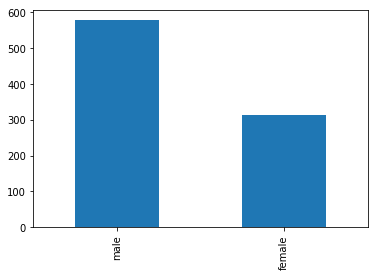

In [43]:
%matplotlib inline 
#add this line to show plot in Jupyter 
train.Sex.value_counts().plot(kind='Bar')

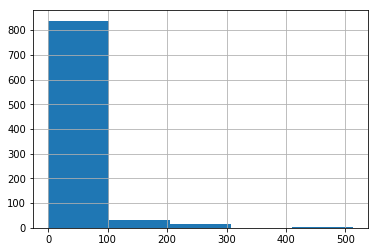

In [45]:
train.Fare.hist(bins=5)

In [67]:
train.loc[train['Fare']==0]
#loc[indexer]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [69]:
#train[train.Fare==0]
#another way to show passengers with Fare = 0$

In [65]:
survived = train.pop("Survived")
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Look at Age -> only 714 passengers among total 891 provided their age -> miss data
what should i do? Try 1: impute age

In [17]:
#impute Age with mean
train["Age"].fillna(train.Age.mean(),inplace=True)
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
numeric_variable = list(train.dtypes[train.dtypes !="object"].index)
train[numeric_variable].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [25]:
#obb_score=true, n_estimators is higher than the default (10).
#need more understand on why he chooses random_state = 42 or 33 decision tree??? whywhy
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(train[numeric_variable],survived)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [74]:
#For regression, , the oob_score_attribute give the  R^2 based on the oob prediction. We want to use c-stat, 
#but i mention there for awareness. By the way, attributes in sklearn that have a trailing underscore 
#are only available after model has been run fit method.
model.oob_score_

0.1361695005913669

In [79]:
survived_oob = model.oob_prediction_
print ("c-stat: "), roc_auc_score(survived,survived_oob)

c-stat: 


(None, 0.73995515503999831)

In [87]:
#Here is a simple function to show descriptive stats on the categorical variables 
def describe_categorical(train):
    from IPython.display import display, HTML
    display(HTML(train[train.columns[train.dtypes=="object"]].describe().to_html()))

In [88]:
describe_categorical(train)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nakid, Miss. Maria (""Mary"")",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [99]:
#Drop the variables that may too specific and complicated for this lesson, but absolutely we will explore and play with
#those variables next time, hehe: "Name", "Ticket", "Passenger"
train.drop(["Name"], axis=1, inplace=True)
train()

ValueError: labels ['Name'] not contained in axis

In [ ]:
#Change the Cabin variable to be only the first letter or None
def clean_cabin (train):
    try:
        return train[0]
    except TypeError:
        return "None"